In [4]:
# sklearn içerisinden mnist el yazısı gelmektedir
import pandas as pd 
from matplotlib import pyplot as pl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np 


mnist = fetch_openml('mnist_784')


In [5]:
mnist.data.shape

(70000, 784)

In [6]:
def showimage(dframe ,index):
    some_digit = dframe.to_numpy()[index]
    some_digit_image = some_digit.reshape((28, 28))
    pl.imshow(some_digit_image, cmap="binary")
    pl.axis("off")


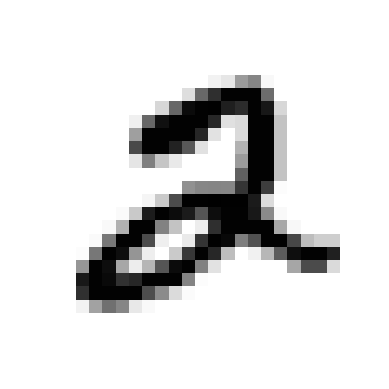

In [7]:
showimage(mnist.data ,5)

In [8]:
train_img, test_img, trainlbl, test_lbl =train_test_split(mnist.data, mnist.target, test_size = 1/7.0, random_state = 0)#test oranını belirliyorum
type(test_img)

pandas.core.frame.DataFrame

In [9]:
test_img_copy = test_img.copy()

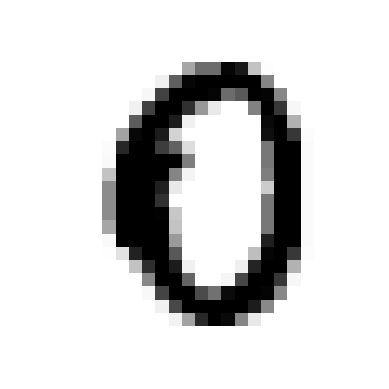

In [10]:
showimage(test_img_copy, 0)

In [11]:
scaler = StandardScaler()

In [13]:
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)




In [14]:
pca = PCA(.95)


In [15]:
pca.fit(train_img)


PCA(n_components=0.95)

In [16]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)



In [17]:
logistic_reg = LogisticRegression(solver='lbfgs',max_iter=1000)
logistic_reg.fit(train_img, trainlbl)


LogisticRegression(max_iter=1000)

In [19]:
logistic_reg.predict(test_img[0].reshape(1,-1))

array(['0'], dtype=object)

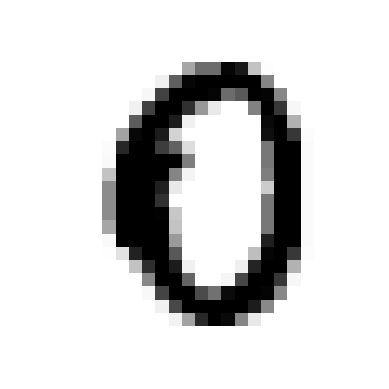

In [20]:
showimage(test_img_copy, 0)

In [21]:
logistic_reg.score(test_img, test_lbl)

0.9185